In [7]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import random as rnd


%matplotlib inline

In [14]:
def drawGz(G,z,c):
    # DO NOT MODIFY THIS FUNCTION
    # This function draws G with node labels from partition z
    #
    # input  : G is a networkx graph
    #        : z is a dictionary of group labels for G's nodes
    #        : c is number of groups in z
    # output : none
    # 
    # WARNING: function is optimistic: assumes inputs are properly formatted
    seed=328
    rnd.seed(seed)

    # colors = ['#d61111','#11c6d6','#d67711','#11d646','#1b11d6','#d611cc'] # map node labels to colors (for the visualization)
        
    colors=[]
    
    for i in range(c):
        color='#%06x'%rnd.randint(0,0xFFFFFF) #pick 29 colors
        for col in colors:
            if col==color:
                color='#%06x'%rnd.randint(0,0xFFFFFF) #try to keep colors unique
        colors.append(color)


    node_colors = []
    for i in G.nodes():
        node_colors.append(colors[int(z[i])])
    nsize  = 600
    flabel = True
    

    if G.order() > 50:
        nsize  = 100
        flabel = False
        
    nx.draw_networkx(G,with_labels=flabel,node_size=nsize,width=1,node_color=node_colors) # draw it pretty
    limits=plt.axis('off')                                      # turn off axes
    plt.show() 

    return

In [15]:
def compute_MGD_Gnp(n,p,rep):
    # input : a number of nodes 'n', edge density parameter 'p', and number of repetitions 'rep'
    # output: the mean geodesic path length of G(n,p), averaged over 'rep' instances
    ellsum=0
    for i in range(rep):
        G=nx.fast_gnp_random_graph(n,p)
        ellsum=ellsum+compute_MGD(G)
    return ellsum/rep


In [16]:
def compute_MGD(G):
    # input : a networkx graph G
    # output: the mean geodesic path length (defined in Lecture 2)

    # YOUR CODE HERE
    ld=dict(nx.all_pairs_shortest_path_length(G))
    z=0
    psum=0
    for i in ld:
        ldd=ld[i]
        for j in ldd:
            if(ldd[j] !=0 and i < j):
                psum=psum+ldd[j]
                z=z+1
    return psum/z

In [17]:
def plot_nullAndEmpirical(nulls,emp,qlabel,nlabel,elabel,xlim,ylim):
    # input: nulls, a list of values representing a null (reference) distribution
    #        emp, the empirical value to be compared to the null
    #        qlabel [string], the name of the empirical quantity, e.g., '<ell>' or 'C'
    #        nlabel [string], the name of the null data series
    #        elabel [string], the name of the empirical data source
    #        xlim [scalar], the upper limit of the x-axis
    #        ylim [scalar], the upper limit of the y-axis

    counts, bins = np.histogram(nulls,bins=50,range=(0,xlim), density=True)
    nreps = len(nulls)

    fig = plt.figure()
    ax1 = fig.add_subplot(111) # put multiple 
    plt.plot(bins[:-1], counts/100, 'b-', alpha=0.5, label=nlabel)
    plt.plot([emp, emp], [0, ylim], 'r-', alpha=0.5, label=elabel)
    plt.xlabel(qlabel)
    plt.ylabel('Pr('+qlabel+')')
    plt.xlim(0, xlim)
    plt.legend(loc='upper right');
    plt.show()
    
    return

reading the network file  : virus_virus_network.txt
reading the metadata file : virus_family_metadata

number of nodes, n  = 586
number of edges, m  = 42475
mean degree,    <k> = 144.97
clustering coefficient, C     =  0.87
mean geodesic distance, <ell> =  1.86


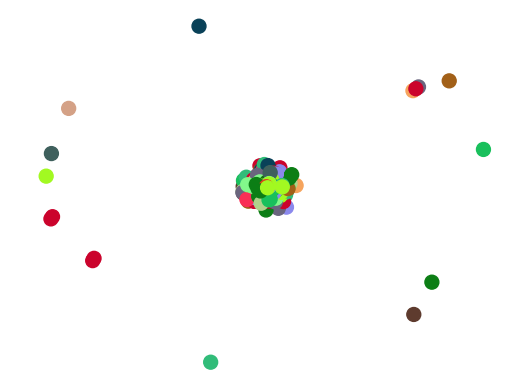

In [18]:
fname1='virus_virus_network.txt'
fname2='virus_family_metadata'


# read in the network file (an edge list)
print(f'reading the network file  : {fname1}')
G = nx.read_edgelist('./' + fname1, delimiter=', ', nodetype=int)  # import simple graph, index nodes by integers (not strings)





#add nodes without edges(we know that there are 586 nodes total)
nodes_missing=list()
for i in range(1,587):
    x=True
    for j in nx.nodes(G):
        if(i==j):
            x=False
    if x==True:
        nodes_missing.append(i)
        
G.add_nodes_from(nodes_missing)
        
        
#remap values to go from 1-586 to 0-585


        
remap={i:i-1 for i in range(1,587)}

nx.relabel_nodes(G,remap,copy=False)
        

        


# read in the node metadata
print(f'reading the metadata file : {fname2}\n')
f = open('./' + fname2,'r')
labels = []
for line in f:
    
    labels.append(line.split(',')[1].rstrip('\n')) # remove the index name for the metadata and strip the \n

s=set()
for i in range(0,len(labels)):
    s.add(labels[i]) #find each unique label
    

# for each node i in G, add (j: j's label) to a dictionary z

# print(labels)
z = {}

for i in range(0,len(labels)):
    z[i] = labels[i]
        


slist=list(s)

zints={}
for i in range(len(slist)):
    for j in z.keys():
        if z[j]==slist[i]:
            zints[j]=i


    
    
n=G.order()
m=G.size()
kmean=2*m/n
C=nx.transitivity(G)
ellmean=compute_MGD(G)

print(f'number of nodes, n  = {n}')
print(f'number of edges, m  = {m}')
print(f'mean degree,    <k> = %5.2f' % kmean)
print(f'clustering coefficient, C     = %5.2f' % C)
print(f'mean geodesic distance, <ell> = %5.2f' % ellmean)



c=len(s)

# print(zints)
drawGz(G,zints,c)

edge density p=0.247805


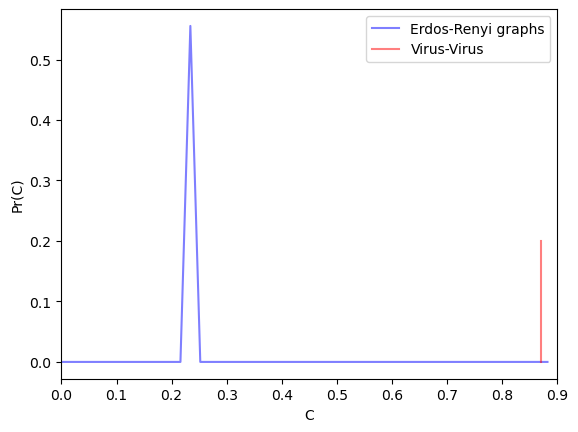

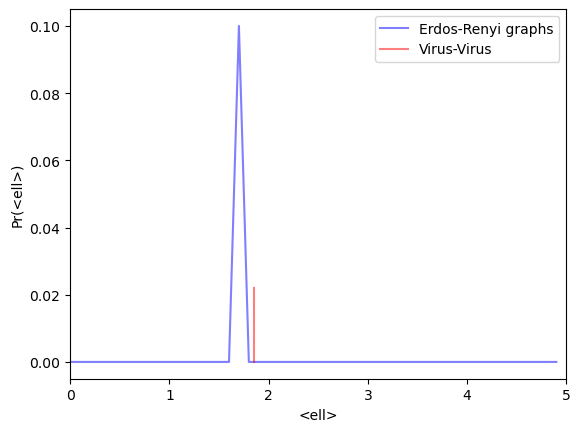

In [22]:
Cs   = []  # store the null values of C here
ells = []  # store the null values of ellmean here

n=G.order()
p=kmean/(n-1)


print('ER random graphs')
print('edge density p=%f'%p)
rep=200
for i in range(rep):
    Gs=nx.fast_gnp_random_graph(n,p)
    Cs.append(nx.transitivity(Gs))
    ells.append(compute_MGD(Gs))



##### do not modify below here #####
plot_nullAndEmpirical(Cs,C,'C','Erdos-Renyi graphs','Virus-Virus',0.9,0.2)
plot_nullAndEmpirical(ells,ellmean,'<ell>','Erdos-Renyi graphs','Virus-Virus',5,0.022)



Cs   = []  # store the null values of C here
ells = []  # store the null values of ellmean here
##### do not modify above here #####






Chung-Lu random graphs


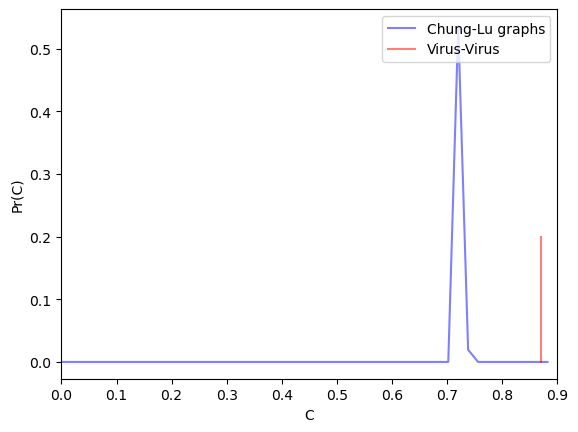

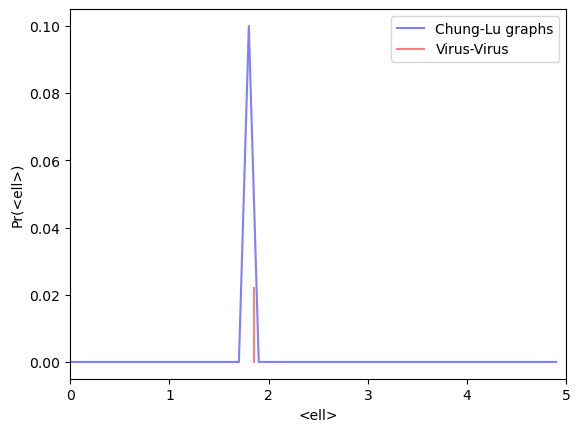

In [26]:
# YOUR CODE HERE
Cs   = []  # store the null values of C here
ells = []  # store the null values of ellmean here
##### do not modify above here #####

deg=nx.degree(G)
k=[i for _,i in deg]
rep=200
for i in range(rep):
    GCL=nx.expected_degree_graph(k,selfloops=False)    
    Cs.append(nx.transitivity(GCL))
    ells.append(compute_MGD(GCL))

print('Chung-Lu random graphs')
##### do not modify below here #####
plot_nullAndEmpirical(Cs,C,'C','Chung-Lu graphs','Virus-Virus',0.9,0.2)
plot_nullAndEmpirical(ells,ellmean,'<ell>','Chung-Lu graphs','Virus-Virus',5,0.022)


